In [0]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [0]:
from torch import nn, optim
import torch.nn.functional as F

In [0]:


class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [3]:
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


In [4]:
ps

tensor([[0.0915, 0.0881, 0.1045, 0.1228, 0.0968, 0.0860, 0.1006, 0.1008, 0.1038,
         0.1051],
        [0.0936, 0.0906, 0.1020, 0.1192, 0.0978, 0.0865, 0.1002, 0.1025, 0.1034,
         0.1043],
        [0.0919, 0.0912, 0.1049, 0.1155, 0.1014, 0.0860, 0.0985, 0.1047, 0.1020,
         0.1040],
        [0.0935, 0.0889, 0.1032, 0.1180, 0.0997, 0.0845, 0.1006, 0.1021, 0.1027,
         0.1068],
        [0.0935, 0.0882, 0.1036, 0.1180, 0.0978, 0.0837, 0.1016, 0.1029, 0.1025,
         0.1083],
        [0.0915, 0.0935, 0.1050, 0.1151, 0.0983, 0.0853, 0.1012, 0.1039, 0.1033,
         0.1030],
        [0.0929, 0.0893, 0.0994, 0.1166, 0.0997, 0.0881, 0.0994, 0.1036, 0.1010,
         0.1101],
        [0.0914, 0.0933, 0.1015, 0.1159, 0.1042, 0.0856, 0.0968, 0.1034, 0.1023,
         0.1055],
        [0.0944, 0.0904, 0.1043, 0.1151, 0.0988, 0.0855, 0.0986, 0.1024, 0.1051,
         0.1053],
        [0.0943, 0.0905, 0.1028, 0.1167, 0.0972, 0.0851, 0.1006, 0.1039, 0.1035,
         0.1054],
        [0

In [5]:
ps.topk(1)

torch.return_types.topk(...)

In [18]:
print(ps.topk(1,dim=1))

torch.return_types.topk(
values=tensor([[0.6607],
        [0.7276],
        [0.5785],
        [0.8758],
        [0.7663],
        [0.9991],
        [0.9997],
        [0.9921],
        [0.9391],
        [1.0000],
        [0.5134],
        [0.5553],
        [1.0000],
        [0.9981],
        [0.9982],
        [0.9707]]),
indices=tensor([[0],
        [4],
        [3],
        [3],
        [3],
        [9],
        [7],
        [9],
        [5],
        [8],
        [4],
        [0],
        [1],
        [9],
        [7],
        [3]]))


In [0]:
top_p,top_class=ps.topk(1,dim=1)

In [8]:
print(top_class[:10,:])

tensor([[3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3]])


In [9]:
top_class.shape

torch.Size([64, 1])

In [10]:
labels.view(*top_class.shape)

tensor([[5],
        [9],
        [6],
        [7],
        [2],
        [3],
        [4],
        [8],
        [5],
        [3],
        [0],
        [3],
        [7],
        [3],
        [7],
        [1],
        [3],
        [3],
        [3],
        [4],
        [7],
        [7],
        [5],
        [4],
        [1],
        [2],
        [9],
        [1],
        [2],
        [4],
        [3],
        [6],
        [4],
        [4],
        [3],
        [1],
        [3],
        [8],
        [4],
        [1],
        [9],
        [0],
        [7],
        [2],
        [6],
        [0],
        [7],
        [1],
        [0],
        [6],
        [4],
        [2],
        [5],
        [4],
        [4],
        [1],
        [6],
        [8],
        [2],
        [4],
        [7],
        [5],
        [4],
        [3]])

In [11]:
equals = top_class == labels
equals.shape

torch.Size([64, 64])

In [12]:
equals = top_class == labels.view(*top_class.shape)
equals.shape
# equals

torch.Size([64, 1])

In [13]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 17.1875%


In [14]:
labels

tensor([5, 9, 6, 7, 2, 3, 4, 8, 5, 3, 0, 3, 7, 3, 7, 1, 3, 3, 3, 4, 7, 7, 5, 4,
        1, 2, 9, 1, 2, 4, 3, 6, 4, 4, 3, 1, 3, 8, 4, 1, 9, 0, 7, 2, 6, 0, 7, 1,
        0, 6, 4, 2, 5, 4, 4, 1, 6, 8, 2, 4, 7, 5, 4, 3])

In [10]:


model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 5
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Los(...)s: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))



Epoch: 1/5..  Training Loss: 0.516..  Test Los(...)s: 0.486..  Test Accuracy: 0.824
Epoch: 2/5..  Training Loss: 0.391..  Test Los(...)s: 0.388..  Test Accuracy: 0.858
Epoch: 3/5..  Training Loss: 0.353..  Test Los(...)s: 0.408..  Test Accuracy: 0.850
Epoch: 4/5..  Training Loss: 0.328..  Test Los(...)s: 0.390..  Test Accuracy: 0.864
Epoch: 5/5..  Training Loss: 0.313..  Test Los(...)s: 0.392..  Test Accuracy: 0.868


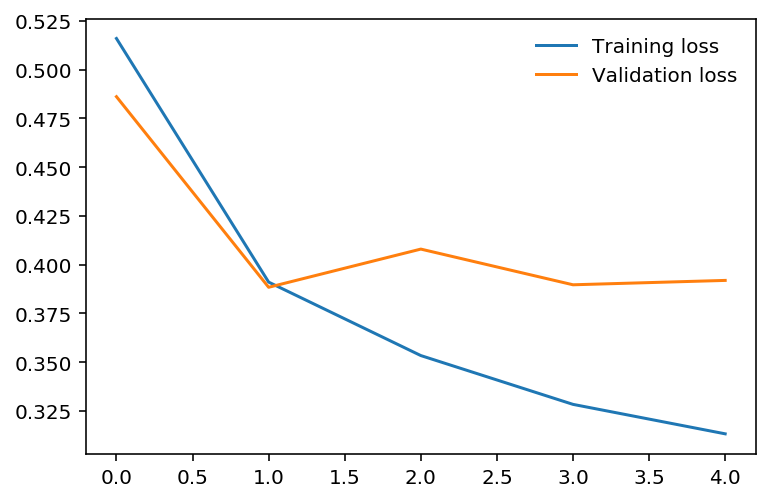

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [0]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(784,256)
    self.fc2=nn.Linear(256,128)
    self.fc3=nn.Linear(128,64)
    self.fc4=nn.Linear(64,10)

    self.dropout=nn.Dropout(p=0.2)

  def forward(self,x):
    x=x.view(x.shape[0],-1)  #(60,784)

    x=self.dropout(F.relu(self.fc1(x)))
    x=self.dropout(F.relu(self.fc2(x)))
    x=self.dropout(F.relu(self.fc3(x)))

    x=F.log_softmax(self.fc4(x),dim=1)

    return x


In [6]:
model=Classifier()
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)

epochs=5
steps=0

train_losses,test_losses=[],[]
for e in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    optimizer.zero_grad()
    log_ps=model(images)
    loss=criterion(log_ps,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  else:
    test_loss=0
    accuracy=0
    with torch.no_grad():
      model.eval()
      for images,labels in testloader:
        log_ps=model(images)
        test_loss+=criterion(log_ps,labels)
        ps = torch.exp(log_ps)
        top_p,top_class=ps.topk(1,dim=1)
        equals=top_class==labels.view(*top_class.shape)
        accuracy+= torch.mean(equals.type(torch.FloatTensor))

      model.train()

      train_losses.append(running_loss/len(trainloader))
      test_losses.append(test_loss/len(testloader))

      print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Los(...)s: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))



Epoch: 1/5..  Training Loss: 0.609..  Test Los(...)s: 0.456..  Test Accuracy: 0.837
Epoch: 2/5..  Training Loss: 0.486..  Test Los(...)s: 0.425..  Test Accuracy: 0.846
Epoch: 3/5..  Training Loss: 0.450..  Test Los(...)s: 0.418..  Test Accuracy: 0.847
Epoch: 4/5..  Training Loss: 0.431..  Test Los(...)s: 0.413..  Test Accuracy: 0.852
Epoch: 5/5..  Training Loss: 0.418..  Test Los(...)s: 0.416..  Test Accuracy: 0.852


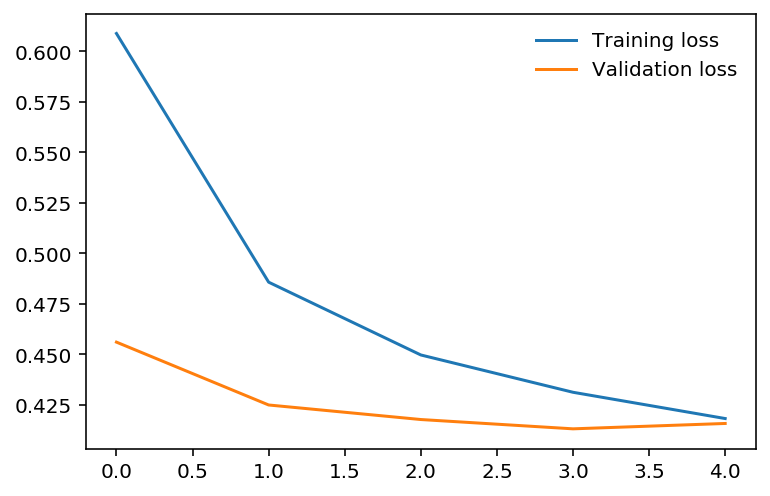

In [8]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)